# Capstone Project - Landmark Recognition

Note: Although the Inception model was trained here, we have not included it in the final report as the aim was to only include top three models. Therefore, its accuracy is not shown here. However, it can be calculated in a similar manner.

## Step 1: Import Bottleneck Features

In [2]:
import numpy as np

In [3]:
train_VGG16 = np.load('Train.npz')['arr_0']
valid_VGG16 = np.load('Valid.npz')['arr_0']
test_VGG16 = np.load('Test.npz')['arr_0']

print('VGG16 loaded')

train_VGG19 = np.load('Train_vgg19.npz')['arr_0']
valid_VGG19 = np.load('Valid_vgg19.npz')['arr_0']
test_VGG19 = np.load('Test_vgg19.npz')['arr_0']

print('VGG19 loaded')

train_Resnet = np.load('Train_resnet.npz')['arr_0']
valid_Resnet = np.load('Valid_resnet.npz')['arr_0']
test_Resnet = np.load('Test_resnet.npz')['arr_0']

print('Resnet loaded')

train_inception = np.load('Train_inception.npz')['arr_0']
valid_inception = np.load('Valid_inception.npz')['arr_0']
test_inception = np.load('Test_inception.npz')['arr_0']

print('Inception loaded')

VGG16 loaded
VGG19 loaded
Resnet loaded
Inception loaded


## Step 2: Model Architecture

The model uses the the pre-trained model as a fixed feature extractor, where the last convolutional output is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each category and is equipped with a softmax.

In [4]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

# VGG16 Model

VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(200, activation='softmax'))

VGG16_model.summary()

# VGG19 Model

VGG19_model = Sequential()
VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))
VGG19_model.add(Dense(200, activation='softmax'))

VGG19_model.summary()

# Resenet Model

resnet_model = Sequential()
resnet_model.add(GlobalAveragePooling2D(input_shape=train_Resnet.shape[1:]))
resnet_model.add(Dense(200, activation='softmax'))

resnet_model.summary()

# Inception Model

inception_model = Sequential()
inception_model.add(GlobalAveragePooling2D(input_shape=train_inception.shape[1:]))
inception_model.add(Dense(200, activation='softmax'))

inception_model.summary()

C:\Users\guevarau\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               102600    
Total params: 102,600
Trainable params: 102,600
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               102600    
Total params: 102,600
Trainable params: 102,600
Non-trainable params: 0
_________________________________________________________________
________________________________________________________________

## Step 3: Compile the Models

In [5]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

VGG19_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

resnet_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

inception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Step 4: Process Data

In [8]:
from keras.callbacks import ModelCheckpoint  
from keras.utils import np_utils

import pandas as pd
train_targets = pd.read_csv('train_real.csv')['landmark_id']
valid_targets = pd.read_csv('valid_real.csv')['landmark_id']
test_targets = pd.read_csv('test_real.csv')['landmark_id']

un = np.unique(train_targets)

j=0
for c,ii in enumerate(un):
    train_targets = train_targets.replace(ii,j)
    valid_targets = valid_targets.replace(ii,j)
    test_targets = test_targets.replace(ii,j)
    j = j + 1


train_targets2 = np_utils.to_categorical(np.array(train_targets),200)
valid_targets2 = np_utils.to_categorical(np.array(valid_targets),200)
test_targets2 = np_utils.to_categorical(np.array(test_targets),200)

## Step 5: Train the Models

In [38]:
checkpointer = ModelCheckpoint(filepath='weights.best.VGG16.hdf5', 
                               verbose=0, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets2, 
          validation_data=(valid_VGG16, valid_targets2),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=0)

print('VGG16 trained')

checkpointer1 = ModelCheckpoint(filepath='weights.best.VGG19.hdf5', 
                               verbose=0, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets2, 
          validation_data=(valid_VGG19, valid_targets2),
          epochs=20, batch_size=20, callbacks=[checkpointer1], verbose=0)

print('VGG19 trained')

checkpointer2 = ModelCheckpoint(filepath='weights.best.resnet.hdf5', 
                               verbose=0, save_best_only=True)

resnet_model.fit(train_Resnet, train_targets2, 
          validation_data=(valid_Resnet, valid_targets2),
          epochs=20, batch_size=20, callbacks=[checkpointer2], verbose=0)

print('Resnet trained')

#checkpointer3 = ModelCheckpoint(filepath='weights.best.inception.hdf5', 
#                               verbose=0, save_best_only=True)

#inception_model.fit(train_inception, train_targets2, 
#          validation_data=(valid_inception, valid_targets2),
#          epochs=20, batch_size=20, callbacks=[checkpointer3], verbose=0)

# print('Inception trained')


VGG16 trained
VGG19 trained
Resnet trained


## Step 6: Load the Model with the Best Validation Loss

In [39]:
VGG16_model.load_weights('weights.best.VGG16.hdf5')

VGG19_model.load_weights('weights.best.VGG19.hdf5')

resnet_model.load_weights('weights.best.resnet.hdf5')

#inception_model.load_weights('weights.best.inception.hdf5')


## Step 7: Test the Model

In [40]:
# VGG16

VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets2, axis=1))/len(VGG16_predictions)
print('VGG16 Test accuracy: %.4f%%' % test_accuracy)

# VGG19

VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets2, axis=1))/len(VGG19_predictions)
print('VGG19 Test accuracy: %.4f%%' % test_accuracy)

# Resnet

resnet_predictions = [np.argmax(resnet_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet]

test_accuracy = 100*np.sum(np.array(resnet_predictions)==np.argmax(test_targets2, axis=1))/len(resnet_predictions)
print('Resnet Test accuracy: %.4f%%' % test_accuracy)

# Inception

#inception_predictions = [np.argmax(inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_inception]

#test_accuracy = 100*np.sum(np.array(inception_predictions)==np.argmax(test_targets2, axis=1))/len(inception_predictions)
#print('Inception Test accuracy: %.4f%%' % test_accuracy)


VGG16 Test accuracy: 88.8176%
VGG19 Test accuracy: 89.6731%
Resnet Test accuracy: 97.0364%


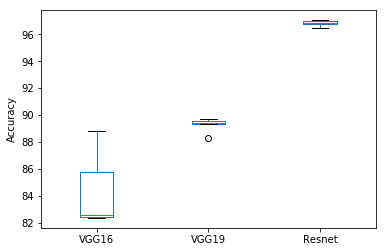

In [50]:
data = {'VGG16':[82.3709, 82.432, 82.3709, 82.5848, 82.4931, 82.5542, 83.257, 86.5872, 88.6037, 88.8176], 
       'VGG19': [88.3288, 89.4898, 89.3064, 89.337, 89.3064, 89.3981, 89.5509, 89.5203, 89.5509, 89.6731],
       'Resnet': [96.4253, 96.7919, 96.517, 96.7614, 96.9447, 96.7614, 97.0058, 97.0058, 97.0364, 97.0364]}

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
ax = df.boxplot(column=['VGG16', 'VGG19', 'Resnet'], grid=False)
ax.set_ylabel('Accuracy')

plt.savefig('boxplot.png')